
# **1. Introduction**
- Movies have been a popular form of entertainment for over a century and have become an integral part of our culture. They provide an escape from reality, a way to experience new stories and emotions, and a medium for sharing ideas and perspectives. The movie industry is also a significant economic force, generating billions of dollars in revenue each year and employing millions of people worldwide.


- The movies dataset contains a wealth of information about thousands of movies, including details such as the movie title, release date, genre, production budget, box office revenue, and critical ratings. This data provides a unique opportunity to explore the movie industry, identify patterns and trends, and gain insights into what makes a successful movie.


# **2. Problem Statement**
---
The problem statement for a movies dataset could be to analyze and predict various aspects of movies based on the provided data. For example:
1.	Predicting the box office revenue of a movie based on its genre, production budget, release date, and other factors.
2.	Identifying the most successful movie genres in terms of revenue and audience ratings.
3.	Predicting the success of a movie based on its cast and crew, including actors, directors, and producers.
4.	Analyzing trends in the movie industry over time, such as changes in popular genres or box office performance.
5.	Identifying the most popular movies of a particular year or decade based on factors like box office revenue, critical acclaim, or audience ratings.

<img src="https://media.proprofs.com/images/QM/user_images/2503852/New%20Project%20(14)(410).jpg" style="height:400px" />

Through this analysis, we hope to gain a better understanding of the movie industry and the factors that contribute to a movie's success. By identifying these factors, we can better inform decisions about movie production, marketing, and distribution, ultimately leading to more successful and profitable movies.


### **Importing Libraries**


In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations

import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

# **4. Data Acquisition & Description**
---
- Before going further have a good idea about the features of the data set:

|Id|Feature|Description|
|:--|:--|:--|
|01|Rank|Movie Rank| 
|02| Title | Title of the movie|  
|03| Genre | The various Genre that the movie can be associated with| 
|04| Description| Short description about the movie|   
|05| Director| Director of the movie|
|06| Actors| Main actors in the movie|
|07| Year| Year in which the movie was released|
|08| Runtime (minutes)| Total movie playing time|
|09| Rating | Movie rating|
|10| Votes| Vores for the movie|
|11| Revenue (Millions)| Revenue by the movie (in millions)|
|12| Metascore| Is the score of the movie on the metacritic website by critics|


In [2]:
movies = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/bansalkiran49/dataset/main/1000%20movies%20data.csv')
print('movies Shape:', movies.shape)
movies.head()

movies Shape: (1000, 12)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


**Observation:**
- There are 1000 datapoints and 12 features

### **Data Information**
- In this section we will see the **information about the types of features**.


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


**Observation:**
- There are **7 numerical** and **5 categorical** features.
- **Rank, Year, Runtime (Minutes) and Votes** These 4 features are of **int datatype**.
- **Title, Genre, Description, Director, Actors** These 5 features are of **object datatype**.
- **Rating, Revenue (Millions), Metascore** These features are of **float datatype**.
- **Revenue (Millions) & Metascore features** have **missing values**.

### **Data Description**

- To get some quick description out of the data

In [4]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


**Observation:**
- **Revenue (Millions)** has **min** value = 0.00.


# **5. Data Pre-Profiling**
- This section is emphasised on getting a report about the data.

### Checking for missing Data

In [5]:
num_of_missing_val = movies.shape[0]-movies.count()
missing_val_percent = 100*((movies.shape[0]-movies.count())/movies.shape[0]).sort_values(ascending=False)
print('Number of missing values in each column:')
print(num_of_missing_val)
print('\n')
print('Percentage of missing values in each column:')
print(missing_val_percent)

Number of missing values in each column:
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


Percentage of missing values in each column:
Revenue (Millions)    12.8
Metascore              6.4
Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
dtype: float64


**Observation:**
- **Revenue (Millions)** has **128 (12.8%)** missing data
- **Metascore** has **64 (6.4%)** missing data

### Checking for duplicate Data

In [6]:
movies.duplicated().sum()

0

**Observation:**
- There is **No** duplicate data.

### Checking for Outliers
will have boxplot for all relevant continous data columns.

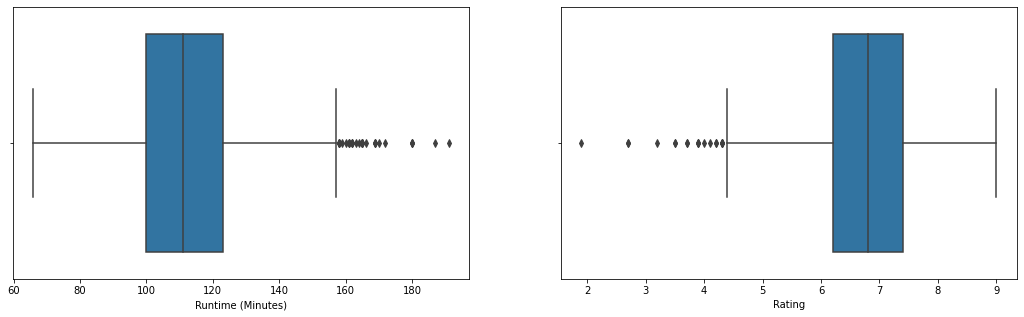

In [7]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.boxplot(movies['Runtime (Minutes)'])
plt.subplot(1,2,2)
sns.boxplot(movies['Rating'])
plt.show()

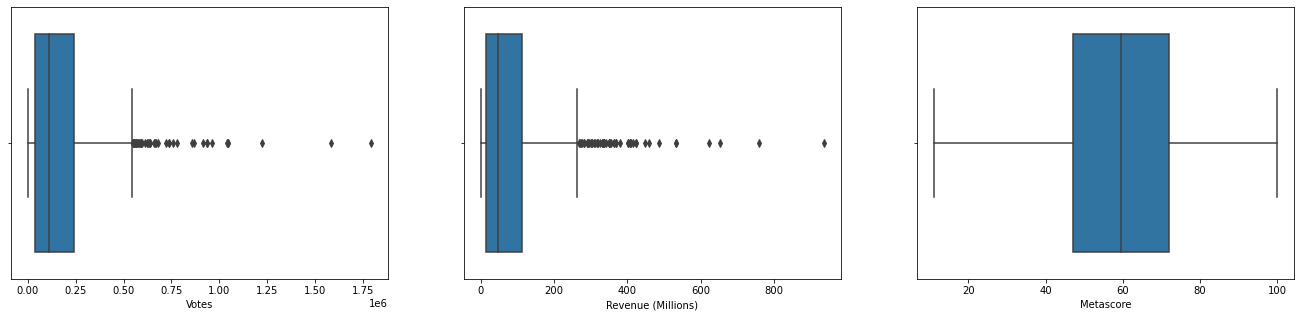

In [8]:
plt.figure(figsize=(23,5))
plt.subplot(1,3,1)
sns.boxplot(movies['Votes'])
plt.subplot(1,3,2)
sns.boxplot(movies['Revenue (Millions)'])
plt.subplot(1,3,3)
sns.boxplot(movies['Metascore'])
plt.show()

**Observation:**

As per boxplots **Runtime (Minutes), Rating, Votes, Revenue (Millions)** have ouliers except **Metascore**
- But will keep these for our analysis.

**Exploring the features**

In this section will dive deep into each column

In [9]:
print('number of unique value in Title:', movies['Title'].nunique())

movies['Title'].value_counts()

number of unique value in Title: 999


The Host                   2
Guardians of the Galaxy    1
The Hurt Locker            1
The Daughter               1
Pineapple Express          1
                          ..
The Fault in Our Stars     1
Blended                    1
Fast & Furious             1
Looper                     1
Nine Lives                 1
Name: Title, Length: 999, dtype: int64

**Observation:**

- There are **999** unique Titles present in the dataset.
- And one duplicate Title name lets see if its same or not.

In [10]:
movies[movies['Title']=='The Host']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
239,240,The Host,"Action,Adventure,Romance",When an unseen enemy threatens mankind by taki...,Andrew Niccol,"Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger",2013,125,5.9,96852,26.62,35.0
632,633,The Host,"Comedy,Drama,Horror",A monster emerges from Seoul's Han River and f...,Bong Joon Ho,"Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...",2006,120,7.0,73491,2.20,85.0


**Observation:**

As we have observed Title 'The Host' appears twice in the dataset but they are two independent movies from different years 2006 and 2013.

In [11]:
print('number of unique value in Genre:', movies['Genre'].nunique())

movies['Genre'].value_counts()

number of unique value in Genre: 207


Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64

**Observation:**

 - It Has **207 unique values** with combination of different genre.

In [12]:
print('number of unique value in Description:', movies['Description'].nunique())

movies['Description'].value_counts()

number of unique value in Description: 1000


A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.                                                                                                                 1
A disgraced member of the Russian military police investigates a series of child murders during the Stalin-era Soviet Union.                                                                                                                    1
A Russian teenager living in London who dies during childbirth leaves clues to a midwife in her journal that could tie her child to a rape involving a violent Russian mob family.                                                              1
The story follows a man who returns home to discover a long-buried family secret, and whose attempts to put things right threaten the lives of those he left home years before.                                                                 1
A process server and his marijua

**Observation:**

- It Has **1000 unique values**.
- The column description can be dropped as it is of no use in our analysis.

In [13]:
print('number of unique value in Director:', movies['Director'].nunique())

movies['Director'].value_counts()

number of unique value in Director: 644


Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
                     ..
Lee Toland Krieger    1
Gillies MacKinnon     1
Peter Atencio         1
James Mangold         1
Scot Armstrong        1
Name: Director, Length: 644, dtype: int64

**Observation:**

- It Has **644 unique values**.


In [14]:
print('number of unique value in Actors:', movies['Actors'].nunique())

movies['Actors'].value_counts()

number of unique value in Actors: 996


Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana                   1
                                                                      ..
Alexi Pappas, Chase Offerle, Rachel Dratch, Andy Buckley               1
Shailene Woodley, Ansel Elgort, Nat Wolff, Laura Dern                  1
Adam Sandler, Drew Barrymore, Wendi McLendon-Covey, Kevin Nealon       1
Vin Diesel, Paul Walker, Michelle Rodriguez, Jordana Brewster          1
Kevin Spacey, Jennifer Garner, Robbie Amell,Cheryl Hines               1
Name: Actors, Length: 996, dtype: int64

**Observation:**

 - It Has **996 unique values** with combination of different Actors.

In [15]:
print('number of unique value in Year:', movies['Year'].nunique())

movies['Year'].value_counts()

number of unique value in Year: 11


2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64

**Observation:**

 - It Has **11 unique values** ranges from year **2006 to 2016**.

In [16]:
print('number of unique value in Runtime (Minutes):', movies['Runtime (Minutes)'].nunique())
print(f"Minimum and maximum value for Runtime are: {movies['Runtime (Minutes)'].min()} and {movies['Runtime (Minutes)'].max()} respectively")

movies['Runtime (Minutes)'].value_counts()

number of unique value in Runtime (Minutes): 94
Minimum and maximum value for Runtime are: 66 and 191 respectively


108    31
100    28
117    27
118    26
106    26
       ..
172     1
164     1
163     1
159     1
145     1
Name: Runtime (Minutes), Length: 94, dtype: int64

**Observation:**

 - It Has **94 unique values** with **minimum** runtime of **66 minutes** and **maximum** runtime of **191 minutes**.

In [17]:
print('number of unique value in Rating:', movies['Rating'].nunique())
print(f"Minimum and maximum value for Rating are: {movies['Rating'].min()} and  {movies['Rating'].max()} respectively")

movies['Rating'].value_counts()

number of unique value in Rating: 55
Minimum and maximum value for Rating are: 1.9 and  9.0 respectively


7.1    52
6.7    48
7.0    46
6.3    44
7.3    42
7.2    42
6.6    42
6.5    40
7.8    40
6.2    37
6.8    37
7.5    35
6.4    35
7.4    33
6.1    31
6.9    31
7.6    27
7.7    27
5.8    26
6.0    26
8.1    26
7.9    23
5.7    21
5.9    19
8.0    19
5.6    17
5.5    14
5.4    12
5.3    12
5.2    11
8.2    10
4.9     7
8.3     7
8.5     6
4.7     6
4.6     5
5.1     5
4.3     4
5.0     4
8.4     4
4.8     4
3.9     3
8.6     3
4.2     2
3.5     2
2.7     2
8.8     2
3.7     2
4.1     1
9.0     1
4.0     1
3.2     1
4.5     1
1.9     1
4.4     1
Name: Rating, dtype: int64

**Observation:**

 - It Has **55 unique values** with **minimum** Rating of **1.9** and **maximum** Rating of **9.0**.

In [18]:
print('number of unique value in Votes:', movies['Votes'].nunique())
print(f"Minimum and maximum value for Votes are: {movies['Votes'].min()} and  {movies['Votes'].max()} respectively")

movies['Votes'].value_counts()

number of unique value in Votes: 997
Minimum and maximum value for Votes are: 61 and  1791916 respectively


97141     2
291       2
1427      2
757074    1
5796      1
         ..
115       1
271301    1
93764     1
217464    1
12435     1
Name: Votes, Length: 997, dtype: int64

**Observation:**

 - It Has **997 unique values** where **minimum** Votes are **61** and **maximum** Votes are **1791916**.

In [19]:
print('number of unique value in Revenue (Millions):', movies['Revenue (Millions)'].nunique())
print(f"Minimum and maximum value for Revenue (Millions) are: {movies['Revenue (Millions)'].min()} and  {movies['Revenue (Millions)'].max()} respectively")

movies['Revenue (Millions)'].value_counts()

number of unique value in Revenue (Millions): 814
Minimum and maximum value for Revenue (Millions) are: 0.0 and  936.63 respectively


0.03      7
0.01      5
0.05      4
0.32      4
0.02      4
         ..
209.81    1
65.27     1
5.69      1
37.55     1
19.64     1
Name: Revenue (Millions), Length: 814, dtype: int64

**Observation:**

 - It Has **814 unique values** where **minimum** Revenue is **0.0** and **maximum** Revenue is **936.63**.
 - will drop the row with Revenue = 0.0

In [20]:
print('number of unique value in Metascore:', movies['Metascore'].nunique())
print(f"Minimum and maximum value for Metascore are: {movies['Metascore'].min()} and  {movies['Metascore'].max()} respectively")

movies['Metascore'].value_counts()

number of unique value in Metascore: 84
Minimum and maximum value for Metascore are: 11.0 and  100.0 respectively


72.0    25
68.0    25
66.0    25
64.0    24
57.0    23
        ..
19.0     1
98.0     1
16.0     1
91.0     1
11.0     1
Name: Metascore, Length: 84, dtype: int64

**Observation:**

 - It Has **55 unique values** with **minimum** Metascore of **11.0** and **maximum** Metascore of **100.0**.

# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- From data profiling done above these are steps needs to be done (mentioned below):
  - Handling missing data,
  - Dropping column 'Description'
  - Dropping datapoint with revenue = 0.0

### Handling of Missing values
In this section we will take appropriate measures for missing data
and from our previous observation we have seen missing data in **Revenue (Millions)** and **Metascore** and we have also obsreved ouliers in the same. so will impute the missing values with the median of respective columns

In [21]:
movies['Revenue (Millions)'] = movies['Revenue (Millions)'].fillna(movies['Revenue (Millions)'].median())

In [22]:
movies['Metascore'] = movies['Metascore'].fillna(movies['Metascore'].median())

### Handling of Redundant data
In this section will drop 'Descroption' and datapoints where Revenue = 0

In [23]:
movies.drop("Description", axis=1, inplace=True)

In [24]:
movies = movies[movies['Revenue (Millions)'] != 0.0]
movies.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0



# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- Lets have a look of cleaned dataset

In [25]:
print('movies Shape:', movies.shape)
movies.head()

movies Shape: (999, 11)


,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [26]:
movies.tail()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,47.985,45.0
996,997,Hostel: Part II,Horror,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010,50.0
998,999,Search Party,"Adventure,Comedy",Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,47.985,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.640,11.0


In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                999 non-null    int64  
 1   Title               999 non-null    object 
 2   Genre               999 non-null    object 
 3   Director            999 non-null    object 
 4   Actors              999 non-null    object 
 5   Year                999 non-null    int64  
 6   Runtime (Minutes)   999 non-null    int64  
 7   Rating              999 non-null    float64
 8   Votes               999 non-null    int64  
 9   Revenue (Millions)  999 non-null    float64
 10  Metascore           999 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.7+ KB


In [28]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000
mean,500.768769,2012.779780,113.190190,6.724725,1.699749e+05,78.558599,59.027027
std,288.838954,3.205949,18.811529,0.944671,1.887836e+05,97.134947,16.641218
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.010000,11.000000
25%,251.500000,2010.000000,100.000000,6.200000,3.631700e+04,17.505000,47.500000
50%,501.000000,2014.000000,111.000000,6.800000,1.108250e+05,47.985000,59.500000
75%,750.500000,2016.000000,123.000000,7.400000,2.400475e+05,99.455000,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# **8. Exploratory Data Analysis**

- This section is emphasised on asking the questions and perform analysis using the data.

### Q1. What is the number of movies released per year?

In [29]:
movies['Year'].value_counts(ascending=True)

2006     44
2009     51
2008     52
2007     53
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    296
Name: Year, dtype: int64

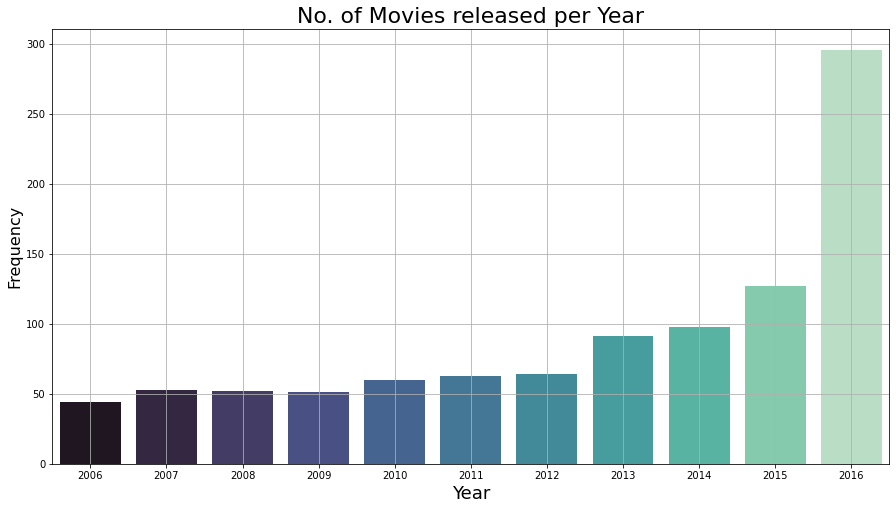

In [30]:
fig = plt.figure(figsize=(15,8))                                          

sns.countplot(x='Year', data=movies, palette = "mako")                                         

plt.title(label='No. of Movies released per Year', size=22)
plt.xlabel(xlabel='Year', size=18)
plt.ylabel(ylabel='Frequency', size=16)
plt.xticks(size=10)
plt.yticks(size=10)
plt.grid(visible=True)

plt.show()

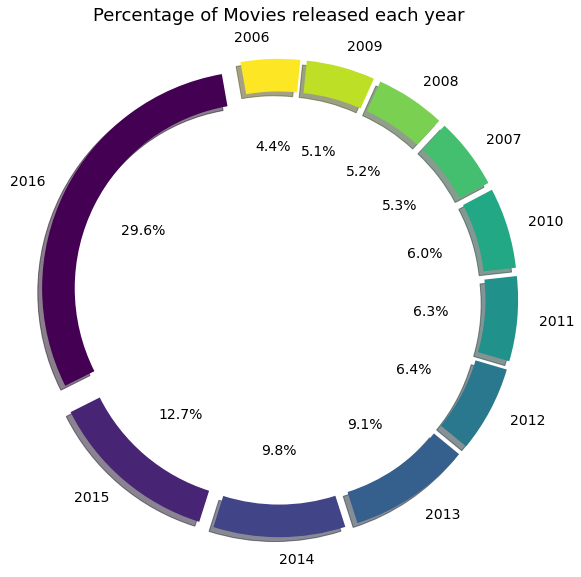

In [31]:



figure = plt.figure(figsize=[10, 10])

space = np.ones(11)/10

movies['Year'].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                       autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=100, cmap='viridis')

plt.ylabel('')
plt.title(label='Percentage of Movies released each year', size=18)
plt.show()

**Observation:**
 - Between 2006 and 2015, there was a steady increase in the number of movies released per year, with a peak of 297 movies released in 2016.
 - There is a huge sudden increase in movies by 16.9% from 2015 to 2016

### Q2. Who are the top 10 Directors made the most movies?

In [32]:
Dir = pd.DataFrame(movies['Director'].value_counts()[:10])
Dir['Dir_name'] = ['Ridley Scott', 'M. Night Shyamalan', 'Michael Bay', 'David Yates',
       'Paul W.S. Anderson', 'Danny Boyle', 'Zack Snyder', 'Antoine Fuqua',
       'Justin Lin', 'J.J. Abrams']
Dir['new_index'] = [1,2,3,4,5,6,7,8,9,10]
Dir.set_index('new_index')

,Director,Dir_name
new_index,,
1,8,Ridley Scott
2,6,M. Night Shyamalan
3,6,Michael Bay
4,6,David Yates
5,6,Paul W.S. Anderson
6,5,Danny Boyle
7,5,Zack Snyder
8,5,Antoine Fuqua
9,5,Justin Lin


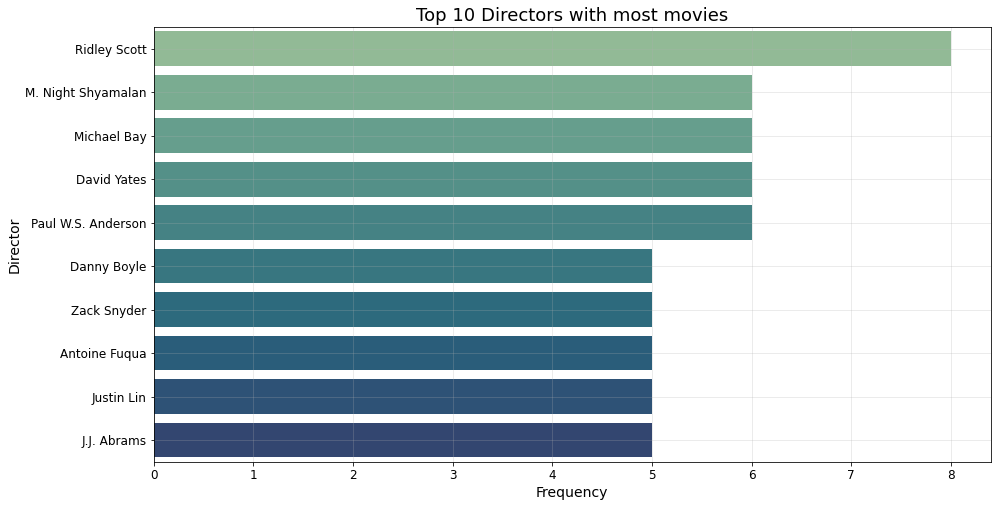

In [33]:
fig = plt.figure(figsize=[15, 8])

sns.barplot(x='Director', y='Dir_name', data = Dir, palette = "crest")

plt.title(label='Top 10 Directors with most movies', size=18)
plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Director', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(visible=True, alpha=0.3)

plt.show()

**Observation:**
- Ridley Scott has directed the max number of movies in the time frame from 2006-2016

### Q3. What are the Top 10 Genre combinations of movies in the dataset?

In [34]:
top_genre = movies['Genre'].value_counts()[:10].index
top_genre

Index(['Action,Adventure,Sci-Fi', 'Drama', 'Comedy,Drama,Romance', 'Comedy',
       'Drama,Romance', 'Animation,Adventure,Comedy',
       'Action,Adventure,Fantasy', 'Comedy,Drama', 'Comedy,Romance',
       'Crime,Drama,Mystery'],
      dtype='object')

In [35]:
df_genre = movies[movies['Genre'].isin(top_genre)]
df_genre.head(2)

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


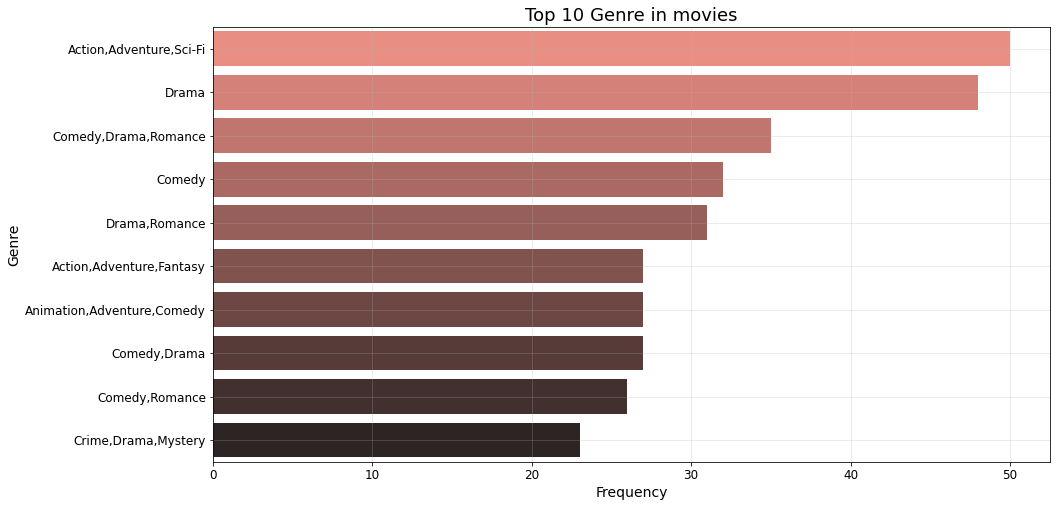

In [36]:
fig = plt.figure(figsize=[15, 8])

sns.barplot(y=df_genre['Genre'].value_counts().index, x=df_genre['Genre'].value_counts(), data = df_genre, palette = "dark:salmon_r")

plt.title(label='Top 10 Genre in movies', size=18)
plt.xlabel(xlabel='Frequency', size=14)
plt.ylabel(ylabel='Genre', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(visible=True, alpha=0.3)

plt.show()

**Observation:**

We can see that **'Action,Adventure,Sci-Fi',  'Drama'** and **'Comedy,Drama,Romance'** dominate the quantity of movie genres.

### Q4. Is there a relationship between the movie's rating and its revenue?

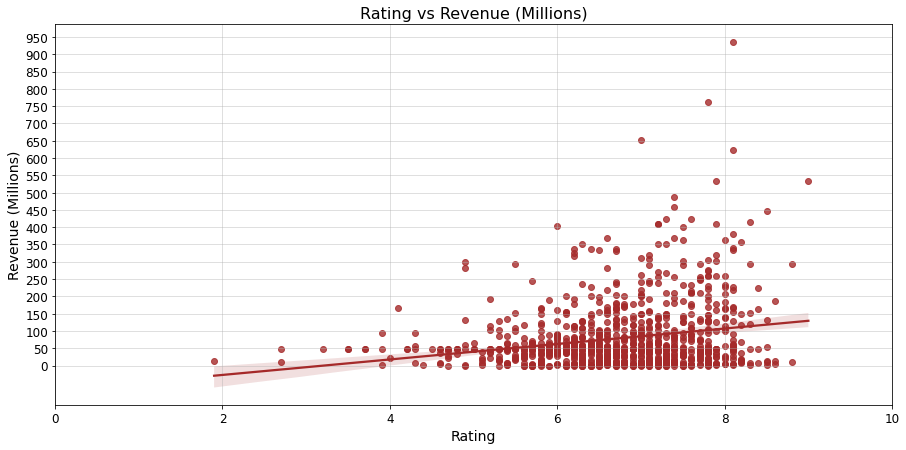

In [37]:
figure = plt.figure(figsize=[15, 7])

sns.regplot(x='Rating', y='Revenue (Millions)', data=movies, color ='brown')

plt.xticks(ticks=np.arange(0, 12, 2), size=12)
plt.yticks(ticks=np.arange(0, 1000, 50), size=12)
plt.xlabel(xlabel='Rating', size=14)
plt.ylabel(ylabel='Revenue (Millions)', size=14)
plt.title(label='Rating vs Revenue (Millions)', size=16)
plt.grid(visible=True, alpha=0.5)
plt.show()

**Observation:**

From above regplot we can see the positive correlation between Rating and Revenue shows Revenue increaing with increase in rating.

### Q5. Does the length of a movie affect its rating?

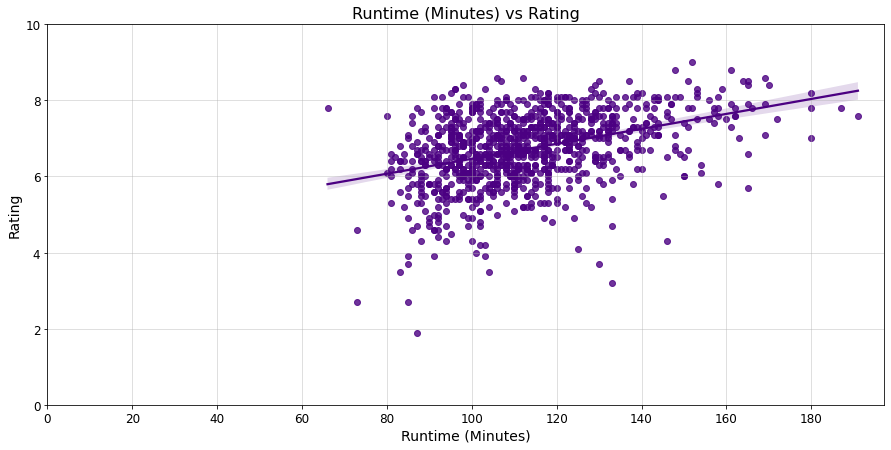

In [38]:
figure = plt.figure(figsize=[15, 7])

sns.regplot(x='Runtime (Minutes)', y='Rating', data=movies, color ='indigo')

plt.xticks(ticks=np.arange(0, 200, 20), size=12)
plt.yticks(ticks=np.arange(0, 12, 2), size=12)
plt.xlabel(xlabel='Runtime (Minutes)', size=14)
plt.ylabel(ylabel='Rating', size=14)
plt.title(label='Runtime (Minutes) vs Rating', size=16)
plt.grid(visible=True, alpha=0.5)
plt.show()

**Observation:**
-  From above regplot between rating and runtime we can observe that rating is increasing with increase in the length of the movie initially but then its slows down

### Q6. Is there a difference in revenue between different genres of movies?

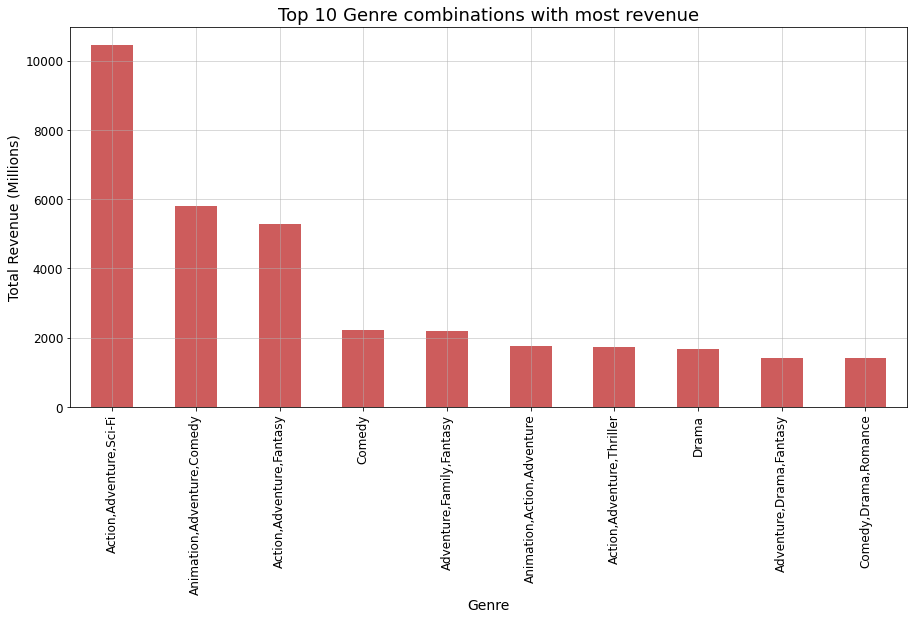

In [39]:
fig = plt.figure(figsize=[15, 7])

movies.groupby('Genre')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10).plot.bar(color='indianred')
plt.title(label='Top 10 Genre combinations with most revenue', size=18)
plt.xlabel(xlabel='Genre', size=14)
plt.ylabel(ylabel='Total Revenue (Millions)', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(visible=True, alpha=0.6)

plt.show()

**Observation:**

Interesting, although they are not the most commonly released genres; "Animation,Adventure,Comedy" and "Action,Adeventure,Fantasy" typically have the most success in terms of Revenue.

### Q7. How does the movie's genre affect its rating?

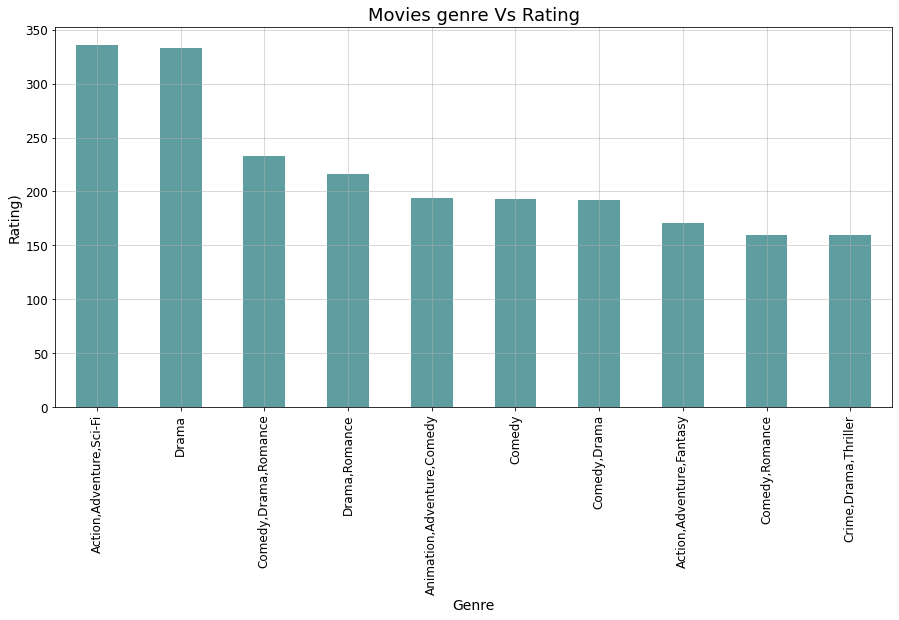

In [40]:
fig = plt.figure(figsize=[15, 7])

movies.groupby('Genre')['Rating'].sum().sort_values(ascending=False).head(10).plot.bar(color='cadetblue')
plt.title(label='Movies genre Vs Rating', size=18)
plt.xlabel(xlabel='Genre', size=14)
plt.ylabel(ylabel='Rating)', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(visible=True, alpha=0.6)

plt.show()

**Observation:**

The bar plot between Genre and Rating shows Action,Adventure,Sci-Fi got the highest rating of 336.2 followed by Drama with 332.9 and Comedy,Drama,Romance with 232.8 rating

### Q8. how movies revenue changed over the years?

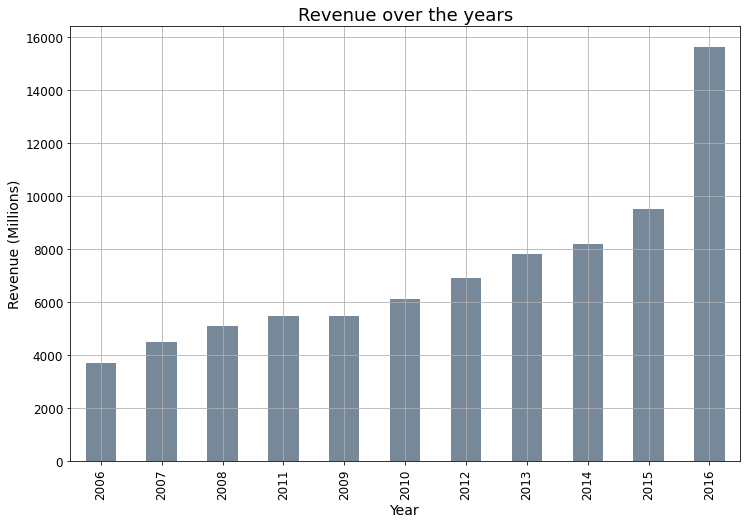

In [41]:
plt.figure(figsize=(12,8))

movies.groupby(['Year'])['Revenue (Millions)'].sum().sort_values().plot(kind='bar', fontsize=13, color='lightslategray')

plt.xlabel(xlabel='Year', fontsize=14)
plt.ylabel(ylabel='Revenue (Millions)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Revenue over the years', fontsize=18)
plt.grid(visible=True)

plt.show()

**Observation:**

we can see that the 2016 shoot to the top in terms of the revenue followed by 2015 and 2014.

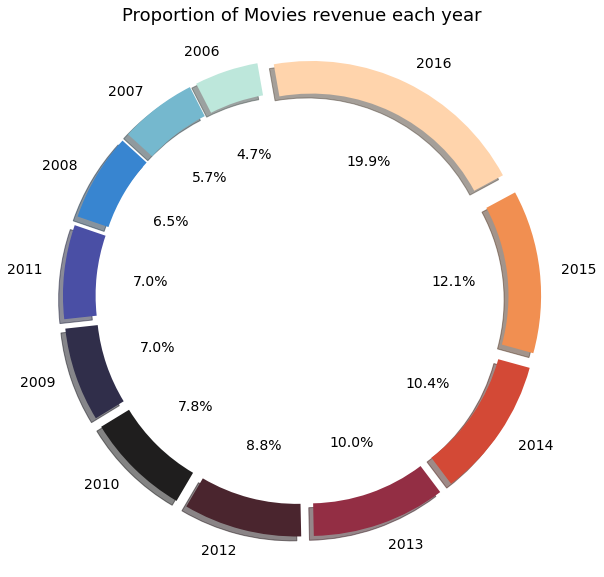

In [42]:
figure = plt.figure(figsize=[10, 10])

space = np.ones(11)/10

movies.groupby(['Year'])['Revenue (Millions)'].sum().sort_values().plot(kind='pie', explode=space, fontsize=14, 
                                       autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=100, cmap='icefire')

plt.ylabel('')
plt.title(label='Proportion of Movies revenue each year', size=18)
plt.show()

### Q9. who are the director's generated most revenue?

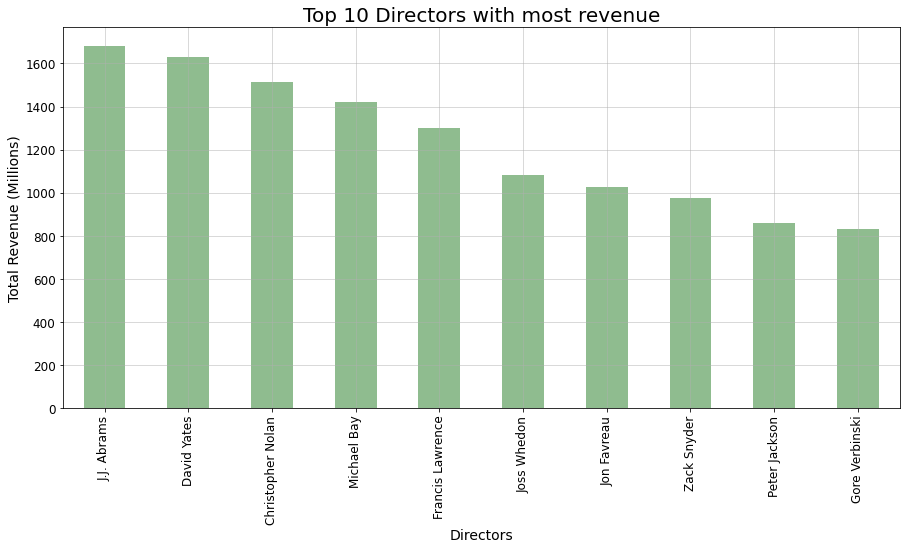

In [43]:
fig = plt.figure(figsize=[15, 7])

movies.groupby('Director')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10).plot.bar(color='darkseagreen')
plt.title(label='Top 10 Directors with most revenue', size=20)
plt.xlabel(xlabel='Directors', size=14)
plt.ylabel(ylabel='Total Revenue (Millions)', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(visible=True, alpha=0.6)

plt.show()

**Observation:**

It appears that the most significant value added comes from the directors j.j.Abrams, David Yates and Christopher Nolan on movies revenue.

### Q10. does the movie's length affect the revenue?

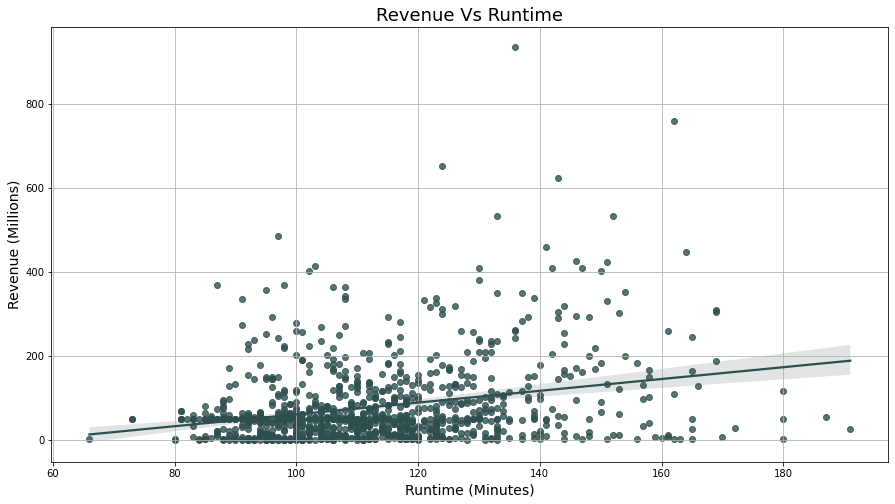

In [44]:
fig = plt.figure(figsize=(15, 8))

ax = sns.regplot(x= 'Runtime (Minutes)', y= 'Revenue (Millions)', data=movies, color ='darkslategrey')
plt.title(label='Revenue Vs Runtime', size=18)
plt.xlabel(xlabel='Runtime (Minutes)', size=14)
plt.ylabel(ylabel='Revenue (Millions)', size=14)
plt.grid(visible=True)

plt.show()

**Observation:**

Although there is a small positive correlation showing that the long the runtime the higher the revenue, it's incredibly minute. With that in mind, we can take from this that, typically, it is not important to keep a movie above or below a cetain time threshold.

### Q11. How is audience's rating of a movie related to metascore by critics?

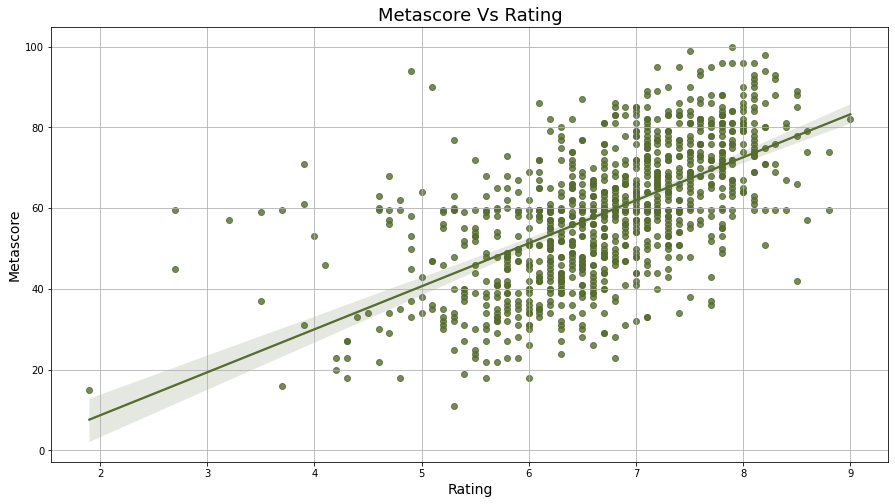

In [45]:
fig = plt.figure(figsize=(15, 8))

ax = sns.regplot(x= 'Rating', y= 'Metascore', data=movies, color ='darkolivegreen')
plt.title(label='Metascore Vs Rating', size=18)
plt.xlabel(xlabel='Rating', size=14)
plt.ylabel(ylabel='Metascore', size=14)
plt.grid(visible=True)

plt.show()

**Observation:**

with regplot between metascore and rating we can observe that metascore affects the rating as they are positively correlated.

### Q12. How does the metascore of a movie affect the revenue?

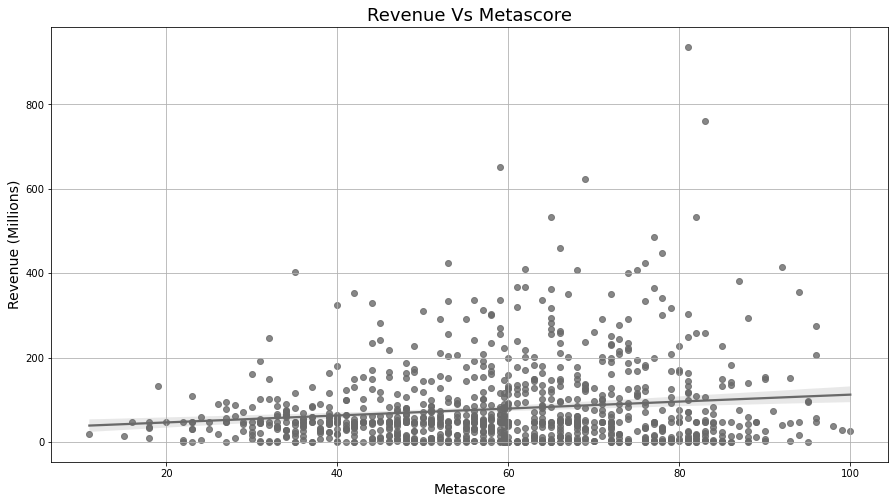

In [46]:
fig = plt.figure(figsize=(15, 8))

ax = sns.regplot(x= 'Metascore', y= 'Revenue (Millions)', data=movies, color ='dimgray')
plt.title(label='Revenue Vs Metascore', size=18)
plt.xlabel(xlabel='Metascore', size=14)
plt.ylabel(ylabel='Revenue (Millions)', size=14)
plt.grid(visible=True)

plt.show()

**Observation:**

from the above plot between metascore and revenue we can say that revenue and metascore increasing simultaneously but with slight diffence observed that revenue of greater than 400 million is seen with merascore above 50.

### Q13. Heatmap of Correlation between features?

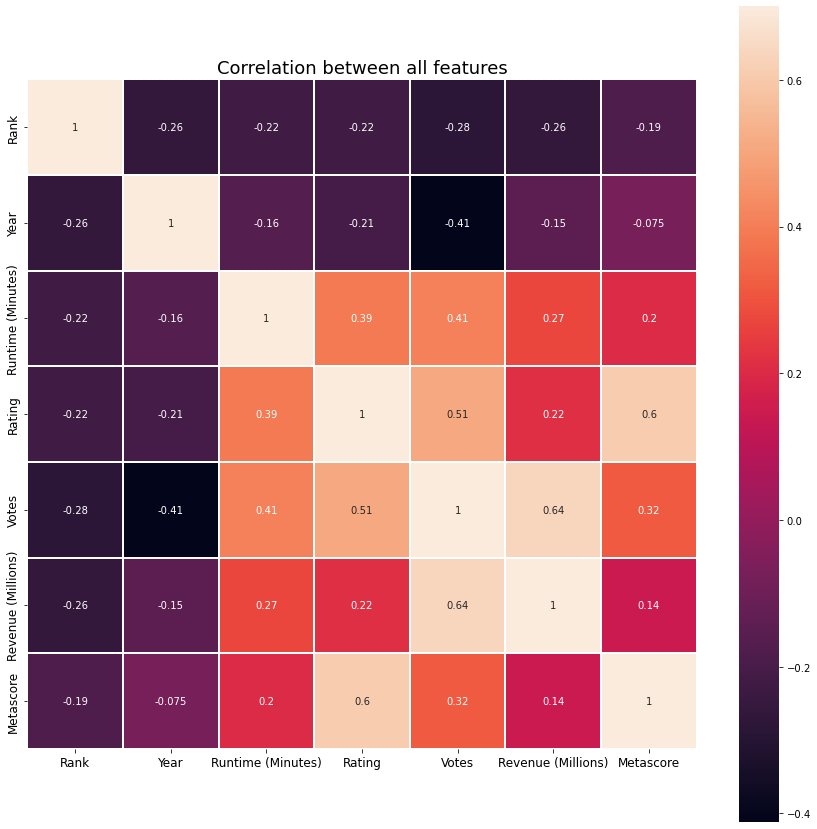

In [47]:
plt.figure(figsize=(15,15))
sns.heatmap(movies.corr(),vmax=.7,linewidth=.01, square = True, annot = True)
plt.title('Correlation between all features', size=18)
plt.yticks(size=12)
plt.xticks(size=12)
plt.show()

**Observations:**
- The highest negative correlation is between votes and year since people were not habitual to giving votes on internet back in those days.

- The highest positive correlation 0.64 is between votes and revenue.

- Second highest positive correlation is between metascore and rating.

As we have seen till now that in the year **2016** trend in movies took a sudden change whether is number of movies, revenue generated by movies or ratings and metascore.
So lets dig deep into the year **2016** to know the genre, directors or actors and combination that affect the movies.

In [48]:
movies2016 = movies[movies['Year']==2016]
movies2016.shape

(296, 11)

### Q14.  what are the genre which generated the most revenue in the year 2016?

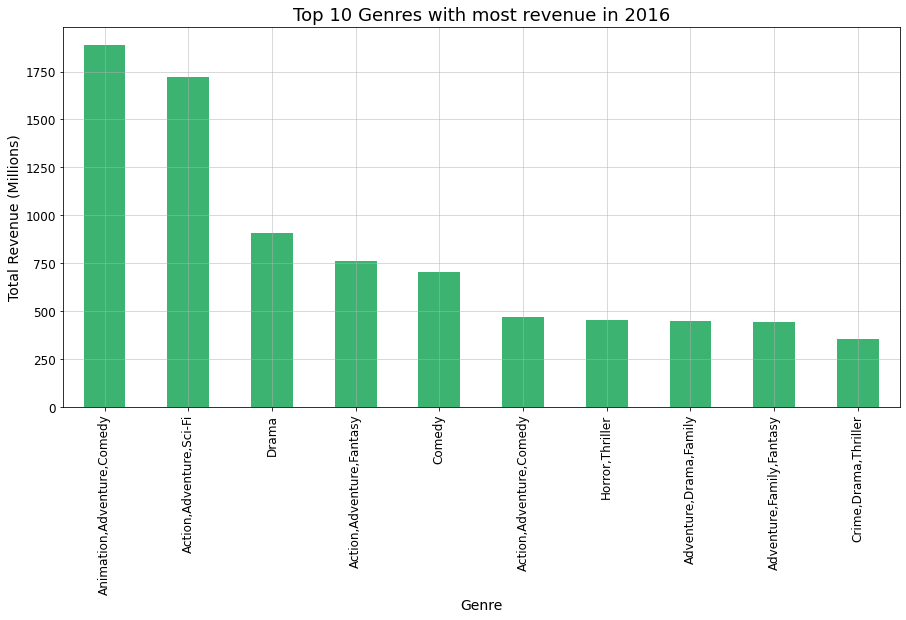

In [49]:
fig = plt.figure(figsize=[15, 7])

movies2016.groupby('Genre')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10).plot.bar(color='mediumseagreen')
plt.title(label='Top 10 Genres with most revenue in 2016', size=18)
plt.xlabel(xlabel='Genre', size=14)
plt.ylabel(ylabel='Total Revenue (Millions)', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(visible=True, alpha=0.6)

plt.show()

**Observations:**
In 2016, movies from 'Animation, Adventure, Comedy' & 'Action, Adventure, Sci-Fi' Genres have generated significantly more revenue than other genre combination.

### Q15. who are the top directors generated most revenue in 2016?

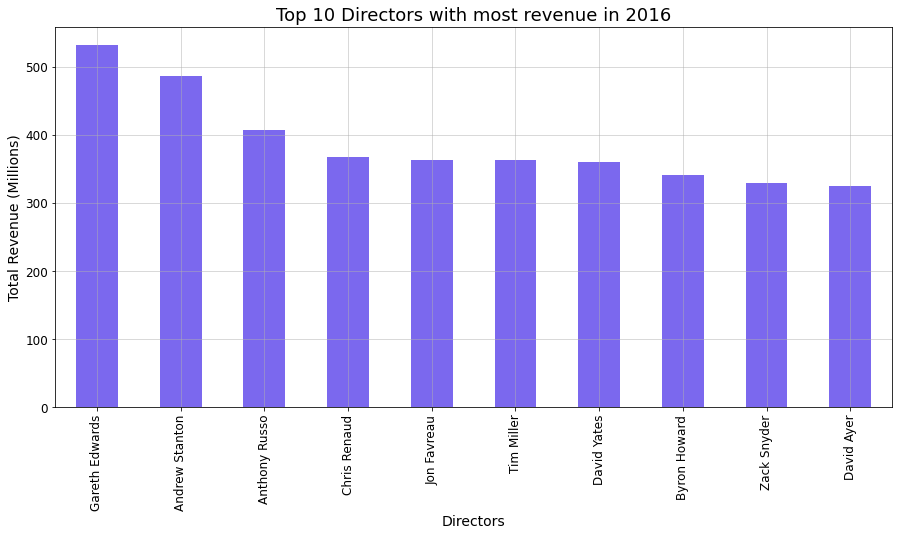

In [50]:
fig = plt.figure(figsize=[15, 7])

movies2016.groupby('Director')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10).plot.bar(color='mediumslateblue')
plt.title(label='Top 10 Directors with most revenue in 2016', size=18)
plt.xlabel(xlabel='Directors', size=14)
plt.ylabel(ylabel='Total Revenue (Millions)', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(visible=True, alpha=0.6)

plt.show()

**Observations:**
In 2016 movies directed by 'Gareth Edwards', 'Andrew Stanton' & 'Anthony Russo' made the most revenue.

### Q16. who are the top actors contributed most revenue in 2016?

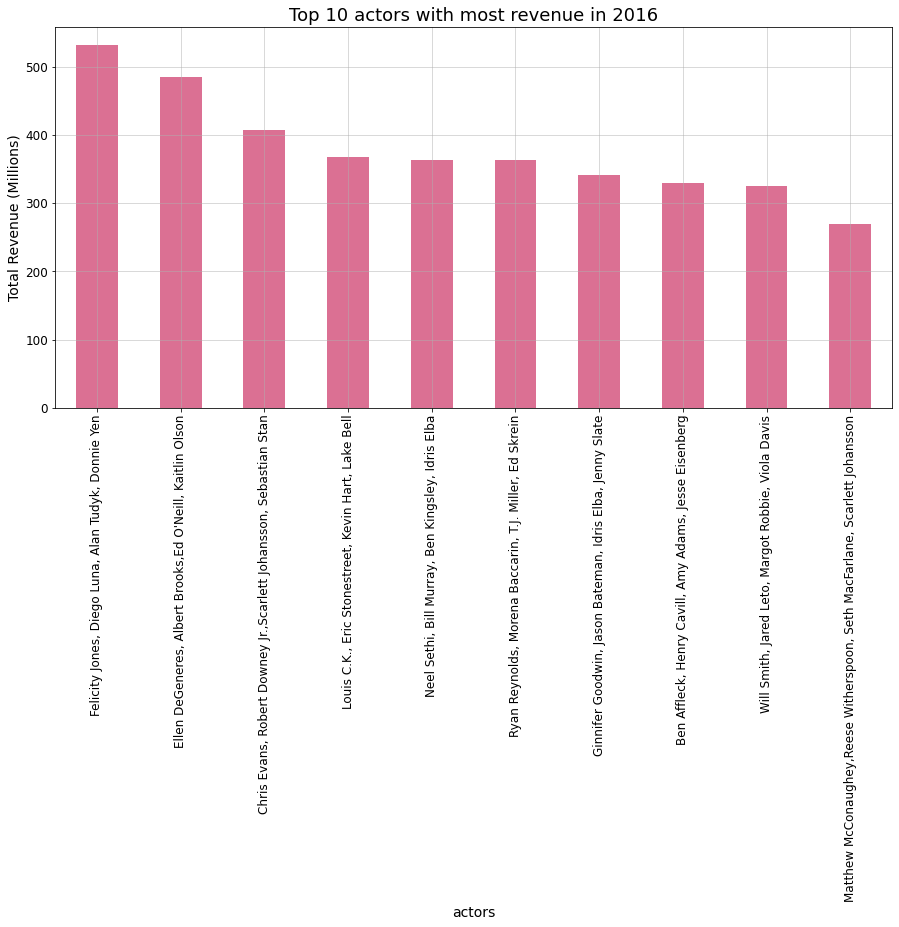

In [51]:
fig = plt.figure(figsize=[15, 7])

movies2016.groupby('Actors')['Revenue (Millions)'].sum().sort_values(ascending=False).head(10).plot.bar(color='palevioletred')
plt.title(label='Top 10 actors with most revenue in 2016', size=18)
plt.xlabel(xlabel='actors', size=14)
plt.ylabel(ylabel='Total Revenue (Millions)', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(visible=True, alpha=0.6)

plt.show()

**Observations:**
Top 3 actors combinations that made the most revenue in 2016 are as follows:

- Felicity Jones, Diego Luna, Alan Tudyk, Donnie Yen

- Ellen DeGeneres, Albert Brooks, Ed O'Neill, Kaitlin Olson

- Chris Evans, Robert Downey Jr., Scarlett Johansson, Sebastian Stan

### Q17. what are top genre got the good rating from the critics?

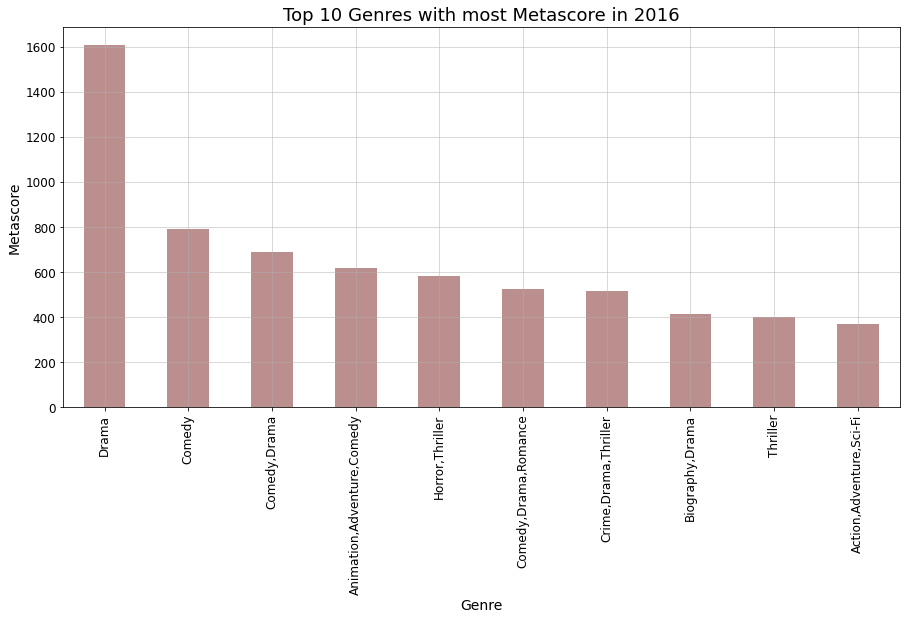

In [52]:
fig = plt.figure(figsize=[15, 7])

movies2016.groupby('Genre')['Metascore'].sum().sort_values(ascending=False).head(10).plot.bar(color='rosybrown')
plt.title(label='Top 10 Genres with most Metascore in 2016', size=18)
plt.xlabel(xlabel='Genre', size=14)
plt.ylabel(ylabel='Metascore', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.grid(visible=True, alpha=0.6)

plt.show()

**Observation:**
- Out of all Drama got highest metascore by critics followed by comedy

# **9. Summarization**
---

### **9.1 Conclusion**

- Metascore and Rating are directly proportional to each other, so we can say that Critics have an influence on Audience Rating.
- The average Duration of a movie ranges from 1 hr 40 min to 2 hrs.
- Most profitable movies are the ones with high Metascore and Rating.
- Just because a director made more number of movies doesn't mean he/she has generated more revenue.

### **9.2 Actionable Insights**

While there are many other factors that we could consider in a future analysis we feel that the following conclusions will result in a successful business venture in movie industry.

- We recommend that Microsoft should focus their efforts on the top 5 most profitable movie genres: "Animation,Adventure,Comedy", "Action,Adventure,Sci-Fi", "Drama", "Action,Adventure,Fantasy", "Comedy".
- We recommend to take into consideration the rating of the movie based on the genre and target audience.
- In terms of runtime, there is little correlation in terms of overall profitability.
- Pick the directors who made high revenues in more than 2 movies